<a href="https://colab.research.google.com/github/tankien76/CS232.K21/blob/master/Room5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/My Drive/room.zip" -d "dataset"

In [2]:
import os
import cv2
from sklearn import preprocessing
from pathlib import Path

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
test_dir="dataset/images/val"
train_dir="dataset/images/train"

train_dir_clean = train_dir + '/clean'
train_dir_messy = train_dir + '/messy'
test_dir_clean = test_dir + '/clean'
test_dir_messy = test_dir + '/messy'

In [6]:
print('number of clean training images - ',len(os.listdir(train_dir_clean)))
print('number of messy training images - ',len(os.listdir(train_dir_messy)))
print('number of clean testing images - ',len(os.listdir(test_dir_clean)))
print('number of messy testing images - ',len(os.listdir(test_dir_messy)))

number of clean training images -  141
number of messy training images -  142
number of clean testing images -  14
number of messy testing images -  14


In [7]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [8]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 283 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [9]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 126)       7

In [11]:
fitted_model = model.fit_generator(training_data,
                        epochs = 25,
                        validation_data = testing_data)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
9/9 [==============================] - 6s 663ms/step - loss: 0.7661 - accuracy: 0.4841 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 2/25
9/9 [==============================] - 6s 667ms/step - loss: 0.7036 - accuracy: 0.4523 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/25
9/9 [==============================] - 6s 651ms/step - loss: 0.6945 - accuracy: 0.4841 - val_loss: 0.6926 - val_accuracy: 0.6786
Epoch 4/25
9/9 [==============================] - 6s 654ms/step - loss: 0.6948 - accuracy: 0.4488 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 5/25
9/9 [==============================] - 6s 657ms/step - loss: 0.6860 - accuracy: 0.5795 - val_loss: 0.6885 - val_accuracy: 0.7857
Epoch 6/25
9/9 [==============================] - 6s 634ms/step - loss: 0.6731 - accuracy: 0.5901 - val_loss: 0.6665 - val_accuracy: 0.8929
Epoch 7/25
9/9 [==============================] - 6s 649ms/step - loss: 0.6360 - acc

In [12]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    if result[0][0]  == 1:
        prediction = 'Clean'
    else:
        prediction = 'Messy'
    return prediction

In [13]:
test_path = []

for filename in os.listdir("dataset/images/test/"):
    test_path.append("dataset/images/test/" + filename)

print("Number of test images: ", len(test_path))

Number of test images:  11


[[0. 1.]]
[[1.0000000e+00 4.1864675e-24]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[1.0000000e+00 2.4434874e-35]]
[[0. 1.]]
[[0. 1.]]


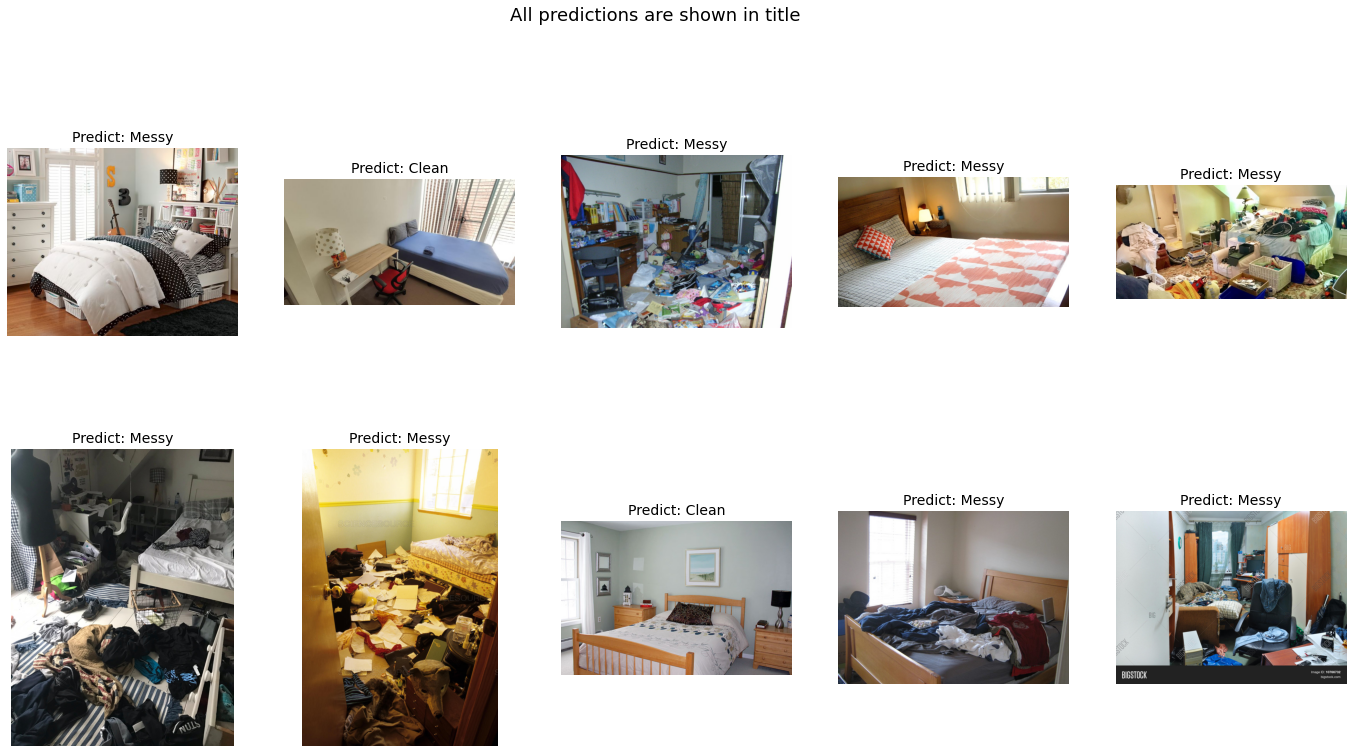

In [14]:
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=0
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(test_path[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
       
        txt = "Predict: {:.5}".format(testing_image(test_path[count]))
        
                
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt, fontsize = 14)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

In [15]:
path = 'https://g6.psychcentral.com/lib/wp-content/uploads/2010/10/messy_room.jpg'

In [17]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1.jpg


In [18]:
testing_image('/content/1.jpg')

[[0. 1.]]


'Messy'